In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
R = pd.ExcelFile('Site_Information_TN.xlsx')
Data = R.parse(sheetname='Sheet1')

In [5]:
print(Data)

    Site No.     Area       Lat       Lon   ele  Nash-Sutcliffe  \
0    3460000     49.2  35.66722 -83.07278  3960            0.90   
1    3470500   5101.0  35.95833 -83.77389   NaN            0.90   
2    3490500   2874.0  36.47194 -82.84722   NaN            0.95   
3    3497100   8963.0  35.94750 -83.89528   NaN            0.90   
4    3497300    106.0  35.66444 -83.71139  3060            0.95   
5    3533500   2921.0  36.20611 -84.10806   NaN            0.85   
6    3535915   3346.0  35.88722 -84.32444   NaN            0.91   
7    3543005  17310.0  35.62028 -84.78333   NaN            0.92   
8    3572375      NaN  34.69972 -85.92111   NaN            0.94   
9    3580750    534.0  35.19222 -86.28111   NaN            0.51   
10   3592250     34.4  34.40111 -87.87333   NaN            0.98   
11   3593005  32820.0  35.06500 -88.25222   NaN            0.94   
12   3596000    107.0  35.47083 -86.12167   NaN            0.96   
13   3599460   1176.0  35.59778 -86.95778   NaN            0.9

In [6]:
alpha_up = Data['alpha']
beta_up = Data['beta']
gama_up = Data['gama']
mu_up = Data['mu']
alpha_down = Data['alpha_down']
beta_down = Data['beta_down']
gama_down = Data['gama_down']
mu_down = Data['mu_down']
T_max = Data['T_max']
T_min = Data['T_min']

In [7]:
T_air = np.empty((14,101))
for i in range(14):
    for j in range(101):
        T_air[i,j] = T_min[i]+j*(T_max[i]-T_min[i])/100

In [8]:
T_stream_up = np.empty((14,101))
T_stream_down = np.empty((14,101))
for i in range(14):
    for j in range(101):
        T_stream_up[i,j] = (alpha_up[i]-mu_up[i])/(1+np.exp(gama_up[i]*(beta_up[i]-T_air[i,j])))+mu_up[i]
        T_stream_down[i,j] = (alpha_down[i]-mu_down[i])/(1+np.exp(gama_down[i]*(beta_down[i]-T_air[i,j])))+mu_down[i]

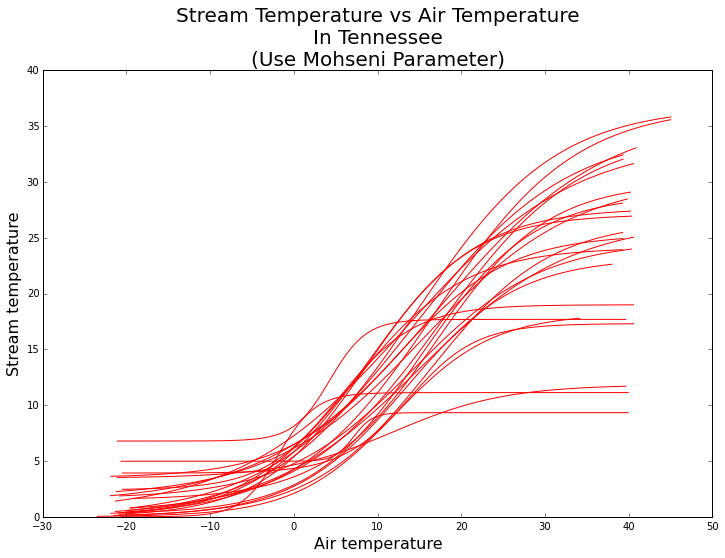

In [9]:
plt.figure(figsize=(12,8))
for i in range(14):
    plt.plot(T_air[i,],T_stream_up[i,],'r')
    plt.plot(T_air[i,],T_stream_down[i,],'r')
    plt.ylim(0,40)
plt.xlabel('Air temperature',fontsize=16)
plt.ylabel('Stream temperature',fontsize=16)
plt.title('Stream Temperature vs Air Temperature\nIn Tennessee\n(Use Mohseni Parameter)',fontsize=20)

In [10]:
T_stream_down

array([[  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  2.38417797e-01,   2.62686431e-01,   2.89398773e-01, ...,
          2.69022274e+01,   2.69214583e+01,   2.69389207e+01],
       [  3.08028934e-01,   3.37205547e-01,   3.69102942e-01, ...,
          2.38895814e+01,   2.39096000e+01,   2.39278935e+01],
       ..., 
       [  5.60705001e-01,   6.05541771e-01,   6.53899146e-01, ...,
          3.56749935e+01,   3.57543443e+01,   3.58280434e+01],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03]])

In [11]:
alpha_down

0     9999.00
1       27.11
2       24.12
3       33.73
4     9999.00
5       17.69
6       19.00
7       27.63
8       34.54
9       11.13
10      28.87
11      36.76
12    9999.00
13    9999.00
Name: alpha_down, dtype: float64

In [12]:
R1 = pd.ExcelFile('TandPara_SW.xlsx')
Data1 = R1.parse(sheetname='Sheet1')

In [13]:
Data1.loc[Data1['site_code'].isin([3497300])]

,site_code,maxT,minT,alpha,beta,gama,mu,alpha_down,beta_down,gama_down,mu_down
125,3497300,38,-21.52,23.2,13.43,0.15,0,9999,9999,9999,9999


In [14]:
alpha_up1 = Data1['alpha']
beta_up1 = Data1['beta']
gama_up1 = Data1['gama']
mu_up1 = Data1['mu']
alpha_down1 = Data1['alpha_down']
beta_down1 = Data1['beta_down']
gama_down1 = Data1['gama_down']
mu_down1 = Data1['mu_down']
T_max1 = Data1['maxT']
T_min1 = Data1['minT']

In [15]:
T_air1 = np.empty((len(alpha_up1),101))
for i in range(len(alpha_up1)):
    for j in range(101):
        T_air1[i,j] = T_min1[i]+j*(T_max1[i]-T_min1[i])/100
T_stream_up1 = np.empty((len(alpha_up1),101))
T_stream_down1 = np.empty((len(alpha_up1),101))
for i in range(len(alpha_up1)):
    for j in range(101):
        T_stream_up1[i,j] = (alpha_up1[i]-mu_up1[i])/(1+np.exp(gama_up1[i]*(beta_up1[i]-T_air1[i,j])))+mu_up1[i]
        T_stream_down1[i,j] = (alpha_down1[i]-mu_down1[i])/(1+np.exp(gama_down1[i]*(beta_down1[i]-T_air1[i,j])))+mu_down1[i]

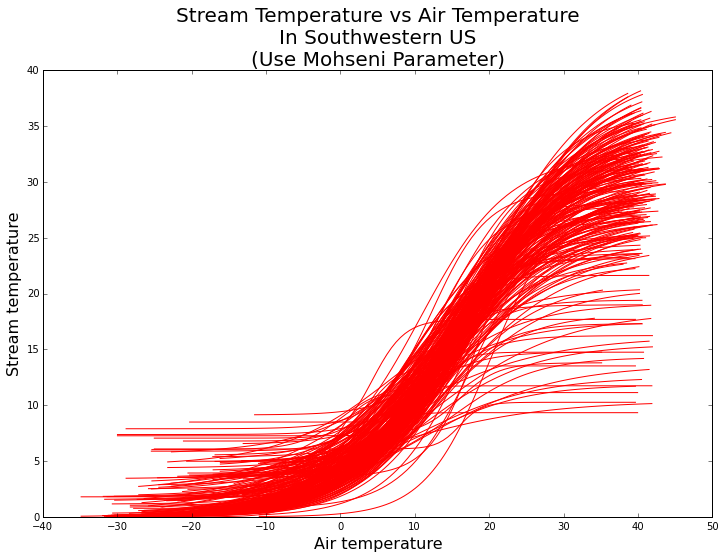

In [16]:
plt.figure(figsize=(12,8))
for i in range(len(alpha_up1)):
    plt.plot(T_air1[i,],T_stream_up1[i,],'r')
    plt.plot(T_air1[i,],T_stream_down1[i,],'r')
    plt.ylim(0,40)
plt.xlabel('Air temperature',fontsize=16)
plt.ylabel('Stream temperature',fontsize=16)
plt.title('Stream Temperature vs Air Temperature\nIn Southwestern US\n(Use Mohseni Parameter)',fontsize=20)

In [17]:
T_stream_down1

array([[  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       ..., 
       [  9.72361316e-01,   1.02346459e+00,   1.07865965e+00, ...,
          2.97495179e+01,   2.97884534e+01,   2.98244631e+01],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03],
       [  9.99900000e+03,   9.99900000e+03,   9.99900000e+03, ...,
          9.99900000e+03,   9.99900000e+03,   9.99900000e+03]])

In [18]:
len(alpha_up1)

175